// can't yet format YamlFrontmatter (["title: Static image export"; "category: General"; "categoryindex: 1"; "index: 2"], Some { StartLine = 2 StartColumn = 0 EndLine = 6 EndColumn = 8 }) to pynb markdown



In [ ]:
#r "nuget: Plotly.NET, 2.0.0-preview.8"
#r "nuget: Plotly.NET.Interactive, 2.0.0-preview.8"
#r "nuget: Plotly.NET.ImageExport, 2.0.0-preview.8"


[![Binder](https://plotly.net/img/badge-binder.svg)](https://mybinder.org/v2/gh/plotly/Plotly.NET/gh-pages?filepath=00_1_image-export.ipynb)&emsp;
[![Script](https://plotly.net/img/badge-script.svg)](https://plotly.net/00_1_image-export.fsx)&emsp;
[![Notebook](https://plotly.net/img/badge-notebook.svg)](https://plotly.net/00_1_image-export.ipynb)

# Static image export

### Table of contents

- [Saving static images](#Saving-static-images)
- [Generating URIs for static chart images](#Generating-URIs-for-static-chart-images)
- [Including static images in dotnet interactive notebooks](#Including-static-images-in-dotnet-interactive-notebooks)

As Plotly.NET generates static html pages that contain charts rendered by plotly.js, static image export needs a lot more overhead under the hood 
than you might expect. The underlying renderer needs to execute javascript, leading to the usage of headless browsers.

The package `Plotly.NET.ImageExport` contains extensions for Plotly.NET to render static images. It is designed with extensibility in mind and
it is very easy to add a new rendering engine. The current engines are provided:

| Rendering engine | Type | Prerequisites |
|-|-|-|
| [PuppeteerSharp](https://github.com/hardkoded/puppeteer-sharp) | headless browser | [read more here](https://github.com/hardkoded/puppeteer-sharp#prerequisites) |

## Saving static images

By referencing the `Plotly.NET.ImageExport` package, you get access to:

 - jpg via `Chart.SaveJPG`
 - png via `Chart.SavePNG`
 - svg via `Chart.SaveSVG`

(and Extensions for C# style fluent interfaces by opening the `GenericChartExtensions` namespace)

The parameters for all three functions are exactly the same. 



In [3]:
open Plotly.NET
open Plotly.NET.ImageExport

let exampleChart = 
    Chart.Histogram2dContour(
        [1.;2.;2.;4.;5.],
        [1.;2.;2.;4.;5.]
    )


In [ ]:
exampleChart
|> Chart.saveJPG(
    "/your/path/without/extension/here",
    Width=300,
    Height=300
)



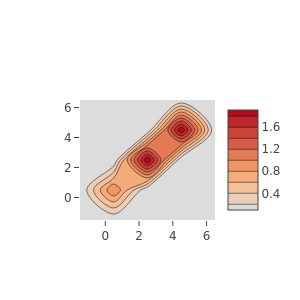

In [ ]:
let imgString = $"""<img
    src= "{exampleChart|> Chart.toBase64JPGString(Width=300,Height=300)}"
/>"""
DisplayExtensions.DisplayAs(imgString,"text/html")


## Generating URIs for static chart images

By referencing the `Plotly.NET.ImageExport` package, you get access to:

 - jpg via `Chart.toBase64JPGString`
 - png via `Chart.toBase64PNGString`
 - svg via `Chart.toSVGString`

(and Extensions for C# style fluent interfaces by opening the `GenericChartExtensions` namespace)




In [5]:
let base64JPG =
    exampleChart
    |> Chart.toBase64JPGString(
        Width=300,
        Height=300
    )


It is very easy to construct a html tag that includes this image via a base64 uri. For SVGs, 
not even that is necessary and just the SVG string can be used.



In [6]:
$"""<img
    src= "{base64JPG}"
/>"""



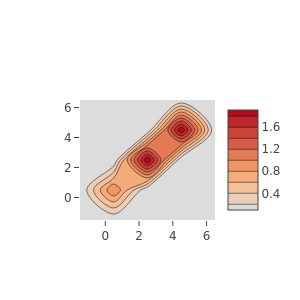

In [ ]:
let imgString = $"""<img
    src= "{base64JPG}"
/>"""
DisplayExtensions.DisplayAs(imgString,"text/html")


SVGs can be included without the image tag:



In [7]:
let svgString =
    exampleChart
    |> Chart.toSVGString(
        Width=300,
        Height=300
    )

svgString.Substring(0,300)
|> printfn "%s"


<svg class="main-svg" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="300" height="300" style="" viewBox="0 0 300 300"><rect x="0" y="0" width="300" height="300" style="fill: rgb(255, 255, 255); fill-opacity: 1;"/><defs id="defs-3e38fc"><g class="clips"><clipPath

In fact, the images shown on this site are included just the same way.

## Including static images in dotnet interactive notebooks

To include the images in dotnet interactive, convert them to html tags as above and include them via 
dotnet interactive's `DisplayAs` function. The content type for PNG/JPG is "text/html", and "image/svg+xml" for SVG.



In [8]:
let base64PNGTag =
    let base64 =
        exampleChart
        |> Chart.toBase64PNGString(
            Width=300,
            Height=300
        )
    $"""<img src= "{base64JPG}"/>"""

let svgString2 =
    exampleChart
    |> Chart.toSVGString(
        Width=300,
        Height=300
    )

// DisplayExtensions.DisplayAs(base64PNG,"text/html")
// DisplayExtensions.DisplayAs(svgString2,"image/svg+xml")


In [ ]:
DisplayExtensions.DisplayAs(base64PNG,"text/html")
DisplayExtensions.DisplayAs(svgString,"image/svg+xml")
